In [11]:
import face_recognition
from PIL import Image

#### Family picture having 5 faces 

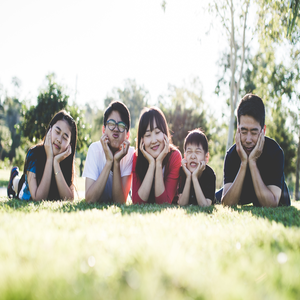

In [28]:
family = Image.open('p.jpg') # total 5 faces
f1 = family.resize((300,300),Image.ANTIALIAS)
f1

https://github.com/ageitgey/face_recognition/wiki/Face-Recognition-Accuracy-Problems 

In [13]:
picture_fam = face_recognition.load_image_file("p.jpg") # Loads the jpg file into a numpy array
face_locations1 = face_recognition.face_locations(picture_fam)

#### 4 faces is detected out of 5

In [29]:
print("{} number of faces are found." .format(len(face_locations1)))

4 number of faces are found.


#### number_of_times_to_upsample=2 is used to correct the error

https://face-recognition.readthedocs.io/en/latest/face_recognition.html 

In [2]:
picture = face_recognition.load_image_file("p.jpg") # Loads the jpg file into a numpy array
face_locations = face_recognition.face_locations(picture,number_of_times_to_upsample=2)
#Find all the faces in the image using the default HOG-based model.

In [18]:
type(picture) # array 

numpy.ndarray

In [7]:
#face_locations
type(face_locations)

list

#### 5 faces are now identified

In [44]:
print("{} number of faces are found." .format(len(face_locations))) 

5 number of faces are found.


https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78 top/right/bottom/left explaination

In [27]:
print("pixel at top: {}".format(face_locations[1][0]))
print("pixel at right: {}".format(face_locations[1][1]))
print("pixel at bottom: {}".format(face_locations[1][2]))
print("pixel at left: {}".format(face_locations[1][3]))

pixel at top: 1109
pixel at right: 2264
pixel at bottom: 1295
pixel at left: 2079


In [6]:
i = 0
for face in face_locations:
    top, right, bottom, left = face
    face_image = picture[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.save("image{}.jpg".format(i))
    i+=1

#### Facial Landmarks

In [2]:
from PIL import ImageDraw

In [3]:
potrait = face_recognition.load_image_file("potrait.jpg")
face_landmarks = face_recognition.face_landmarks(potrait)#facial features

In [4]:
print(type(potrait))
print(type(face_landmarks))
print(type(face_landmarks[0]))

<class 'numpy.ndarray'>
<class 'list'>


dict

In [5]:
face_landmarks[0].keys()

dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip'])

In [6]:
#face_landmarks[0]['chin']

In [7]:
# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(potrait)
draw = ImageDraw.Draw(pil_image)

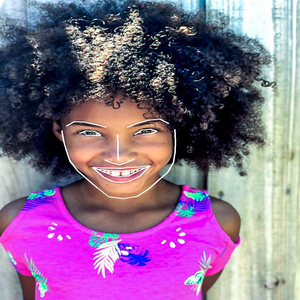

In [51]:
for fl in face_landmarks:
    for facial_feature in fl.keys():
        draw.line(fl[facial_feature], width=5)


landmark = pil_image.save('landmark.jpg')
lm = Image.open('landmark.jpg')
lm = lm.resize((300,300),Image.ANTIALIAS)
lm

#### Face comparison

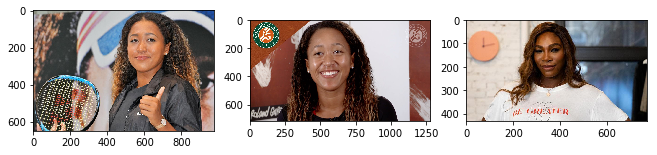

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# read images
img_A = mpimg.imread('naomi1.jpg')
img_B = mpimg.imread('naomi2.jpg')
img_C = mpimg.imread('Serena1.jpeg')
# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C);

In [39]:
list = ['naomi2.jpg','Serena1.jpeg']

In [40]:
for i in list:
    naomi_osaka = face_recognition.load_image_file("naomi1.jpg")
    naomi_encoding = face_recognition.face_encodings(naomi_osaka)[0]
    unknown = face_recognition.load_image_file(i)
    unknown_encoding = face_recognition.face_encodings(unknown)[0]
    comparison = face_recognition.compare_faces([naomi_encoding],unknown_encoding)
    print(comparison)

[True]
[False]


references:

https://pypi.org/project/face_recognition/

https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py

https://www.analyticsvidhya.com/blog/2018/08/a-simple-introduction-to-facial-recognition-with-python-codes/ identify a face 

https://stackoverflow.com/questions/10607468/how-to-reduce-the-image-file-size-using-pil image resizing 

https://stackoverflow.com/questions/50559000/how-do-i-make-2-images-appear-side-by-side-in-jupyter-notebook-ipython displaying image side by side matplotlib

https://www.youtube.com/watch?v=IWoigw6-crg&t=94s 


In [80]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

A computer program that decides whether an image is a positive image (face image) or negative image (non-face image) is called a classifier: 1.Haar Classifier 2.LBP Classifier
Both of these classifiers process images in gray scales, basically because we don't need color information to decide if a picture has a face or not and better performance reasons

HAAR CASCADE CLASSIFIER 

imread: To read/load our image
cv2.cvtColor: converting images to grayscale

In [101]:
test1 = cv2.imread('kids.jpg')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap) function of matplotlib. to display of image

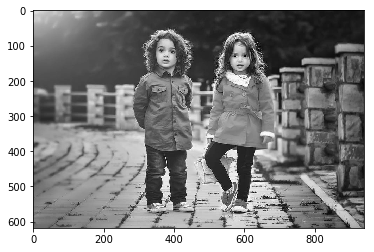

In [102]:
plt.imshow(gray_img, cmap='gray')

Haar classifier: XML training files are stored in the opencv/data/haarcascades/ folder.

https://linuxhint.com/opencv-face-recognition/  print(cv2.__file__) is to be used for file path in python env.

In [85]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('/home/bhavya/anaconda3/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_alt.xml')

detectMultiScale: it returns a list of positions of said face in the form “Rect(x,y,w,h).
Image: gray scale image
scaleFactor:This function compensates a false perception in size that occurs when one face appears to be bigger than the other simply because it is closer to the camera.
minNeighbors: This is a detection algorithm that uses a moving window to detect objects, it does so by defining how many objects are found near the current one before it can declare the face found.

In [103]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
print('Faces found: ', len(faces))

Faces found:  2


In [106]:
#go over list of faces and draw them as rectangles on original colored 
for (x, y, w, h) in faces:     
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

When you load an image using OpenCV, it loads it into BGR color space by default. To show the colored image using matplotlib we have to convert it to RGB space.

In [108]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

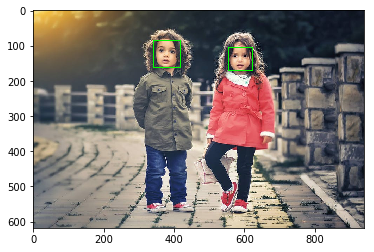

In [109]:
plt.imshow(convertToRGB(test1))

https://www.superdatascience.com/opencv-face-detection/#disqus_thread 
I have learnt opencv using this website.